# **Predictive Modeling of Lung Cancer Adenocarcinoma Genes Using Tree-Based Approaches**

## **Project Background**

**Lung cancer** remains one of the most prevalent and lethal forms of cancer worldwide, with adenocarcinoma being its most common subtype. Despite advancements in treatment, the prognosis for lung adenocarcinoma patients often remains poor due to late-stage diagnoses and limited understanding of the molecular mechanisms driving the disease.

Recent breakthroughs in genomic sequencing have provided researchers with vast amounts of data on the genetic alterations associated with lung adenocarcinoma. However, the complexity and heterogeneity of these genomic profiles present significant challenges in identifying key genes and pathways involved in the development and progression of the disease.

In this context, predictive modeling techniques offer a promising approach to uncovering the genetic signatures underlying lung adenocarcinoma. By leveraging tree-based approaches, such as decision trees, random forests, and gradient boosting machines, researchers can analyze large-scale genomic datasets to identify biomarkers, molecular pathways, and potential therapeutic targets with greater accuracy and efficiency.

## **Project Objectives**

The primary objective of this project is to develop and validate predictive models for identifying key genes associated with lung adenocarcinoma using tree-based approaches. Specifically, the project aims to:

**1. Data Collection and Preprocessing:** Gather comprehensive genomic datasets, including gene expression profiles, somatic mutations, copy number variations, and clinical data, from public repositories and research cohorts. Preprocess the data to remove noise, correct for batch effects, and standardize features for compatibility with tree-based algorithms.

**2. Feature Selection and Model Training:** Employ various tree-based algorithms, such as decision trees, random forests, and gradient boosting machines, to select informative features and build predictive models. Explore different parameter settings and ensemble techniques to optimize model performance and generalization across diverse datasets.

**3. Model Evaluation and Interpretation:** Assess the predictive accuracy, robustness, and generalizability of the developed models using cross-validation, independent validation cohorts, and performance metrics such as area under the receiver operating characteristic curve (AUC-ROC) and precision-recall curve. Interpret the models to identify key genes, molecular pathways, and biological insights underlying lung adenocarcinoma progression.

**4. Clinical Translation and Validation:** Validate the predictive models in clinical settings using patient-derived samples and real-world data. Evaluate the models' utility in predicting patient outcomes, treatment response, and disease prognosis, and assess their potential for guiding personalized therapeutic interventions and clinical decision-making.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, make_scorer, f1_score, accuracy_score, balanced_accuracy_score
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier


c:\Users\jeffr\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **Data Collection**

Collected data from BARRA:CuRDa (https://sbcb.inf.ufrgs.br/barracurda) is to utilize a curated RNA-seq database specifically tailored for cancer research, ensuring high-quality and relevant genomic data for analysis and modeling in the context of lung cancer adenocarcinoma.

In [2]:
# load the data file 
lung_df1 = pd.read_csv("GSE87340.csv")
# display the first five rows
lung_df1.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,SRR4296063,Normal,10.728260,4.668142,10.278195,10.184036,8.215333,11.310861,13.178872,11.469473,...,2.329988,2.329988,2.329988,2.329988,2.329988,2.329988,4.877783,2.329988,2.916440,3.332160
1,SRR4296064,Tumor,11.332606,2.329988,10.127734,10.167900,8.174060,10.399611,13.208972,11.510862,...,2.329988,2.329988,2.931826,2.329988,2.329988,3.375017,4.644066,2.329988,2.329988,3.509185
2,SRR4296065,Normal,9.951182,4.264426,10.288874,10.093258,8.011385,11.814572,14.038661,11.651766,...,2.329988,2.329988,2.931948,2.329988,2.329988,2.329988,5.169625,2.932519,2.329988,3.640437
3,SRR4296066,Tumor,12.185680,2.798643,10.178582,10.401606,8.902321,10.294009,13.170466,11.546855,...,2.329988,2.329988,3.397771,2.329988,2.329988,2.874488,4.548259,2.329988,2.329988,3.720906
4,SRR4296067,Normal,9.875179,2.922071,10.444479,10.435843,8.692961,12.604934,13.538341,11.733252,...,2.329988,2.329988,2.329988,2.329988,2.329988,2.329988,4.055185,2.329988,3.015702,4.348411


In [3]:
# load the data file 
lung_df2 = pd.read_csv("GSE60052.csv")
# display the first five rows
lung_df2.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,SRR1797218,Normal,6.423093,5.179930,4.879843,5.839890,6.078415,5.756283,7.812003,4.843385,...,3.708941,3.708941,3.708941,3.708941,3.708941,4.503814,4.234924,3.708941,3.708941,7.019053
1,SRR1797219,Normal,4.991914,3.708941,5.139865,6.831926,6.183066,7.655465,7.749852,5.723944,...,3.708941,3.708941,3.708941,3.708941,3.708941,3.708941,3.708941,3.708941,3.708941,6.746602
2,SRR1797220,Normal,5.378521,5.294450,4.884195,5.225706,4.682815,7.423949,8.258191,4.992560,...,3.708941,3.708941,4.439132,3.708941,3.708941,5.036719,3.708941,3.708941,3.708941,6.828835
3,SRR1797221,Normal,4.998041,6.188281,3.708941,3.708941,3.708941,7.466507,6.917176,3.708941,...,3.708941,3.708941,3.708941,3.708941,3.708941,3.708941,3.708941,3.708941,5.864157,3.708941
4,SRR1797222,Normal,5.273318,3.708941,4.950478,6.412278,5.956615,6.924628,7.095977,5.142353,...,3.708941,3.708941,3.708941,3.708941,3.708941,3.708941,4.661041,3.708941,4.788796,5.063567


In [4]:
# load the data file 
lung_df3 = pd.read_csv("GSE40419.csv")
# display the first five rows
lung_df3.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,GSM993606,Tumor,10.568931,3.114310,8.704112,9.130016,8.241592,8.387981,11.490738,10.444113,...,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,4.229406,2.531043,2.531043,3.475839
1,GSM993607,Tumor,8.888400,2.531043,8.821358,9.133383,7.566570,10.956587,11.556373,10.689391,...,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,4.122718,2.531043,3.121964,3.536063
2,GSM993608,Tumor,9.709469,2.531043,9.733217,9.022464,7.090320,9.638268,11.774856,10.406903,...,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,3.784356
3,GSM993610,Tumor,12.259593,2.531043,10.030434,9.160498,8.252846,6.701692,9.804658,11.217979,...,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,3.201240
4,GSM993611,Tumor,9.039147,2.531043,8.983013,8.665050,7.030950,9.629136,11.975530,10.607398,...,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,2.531043,3.649756


In [5]:
# load the data file 
lung_df4 = pd.read_csv("GSE37764.csv")
# display the first five rows
lung_df4.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,P1N,Normal,9.869563,3.359294,9.252274,8.919576,7.394545,13.664387,13.268303,10.681938,...,2.870308,2.870308,2.870308,2.870308,2.870308,2.870308,5.276223,2.870308,2.870308,5.796883
1,P1T,Tumor,11.957128,2.870308,9.673054,9.994453,8.393224,9.925747,14.117760,11.041954,...,2.870308,2.870308,2.870308,2.870308,2.870308,2.870308,4.549299,3.561798,2.870308,5.341960
2,P3N,Normal,9.573051,3.370413,9.177268,9.279816,7.376917,11.449583,13.214280,10.657062,...,2.870308,2.870308,2.870308,2.870308,2.870308,2.870308,5.505797,2.870308,3.369478,4.640682
3,P3T,Tumor,11.750409,2.870308,9.178781,10.407126,8.580091,9.525149,12.777749,11.110023,...,2.870308,2.870308,2.870308,3.698260,2.870308,2.870308,5.024206,2.870308,3.545341,4.818864
4,P4N,Normal,9.347072,3.703784,9.021748,8.872918,7.587812,12.715550,13.486744,10.544305,...,2.870308,2.870308,2.870308,2.870308,2.870308,2.870308,4.912281,3.375706,2.870308,4.254559


In [6]:
# concatenate them into a single dataframe
lung_df1_4 = pd.concat([lung_df1, lung_df2, lung_df3, lung_df4])

# view the first five rows 
lung_df1_4.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,SRR4296063,Normal,10.728260,4.668142,10.278195,10.184036,8.215333,11.310861,13.178872,11.469473,...,2.329988,2.329988,2.329988,2.329988,2.329988,2.329988,4.877783,2.329988,2.916440,3.332160
1,SRR4296064,Tumor,11.332606,2.329988,10.127734,10.167900,8.174060,10.399611,13.208972,11.510862,...,2.329988,2.329988,2.931826,2.329988,2.329988,3.375017,4.644066,2.329988,2.329988,3.509185
2,SRR4296065,Normal,9.951182,4.264426,10.288874,10.093258,8.011385,11.814572,14.038661,11.651766,...,2.329988,2.329988,2.931948,2.329988,2.329988,2.329988,5.169625,2.932519,2.329988,3.640437
3,SRR4296066,Tumor,12.185680,2.798643,10.178582,10.401606,8.902321,10.294009,13.170466,11.546855,...,2.329988,2.329988,3.397771,2.329988,2.329988,2.874488,4.548259,2.329988,2.329988,3.720906
4,SRR4296067,Normal,9.875179,2.922071,10.444479,10.435843,8.692961,12.604934,13.538341,11.733252,...,2.329988,2.329988,2.329988,2.329988,2.329988,2.329988,4.055185,2.329988,3.015702,4.348411


In [7]:
# display the data information 
lung_df1_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 11
Columns: 58737 entries, ID to ENSG00000285994
dtypes: float64(58735), object(2)
memory usage: 140.3+ MB


## **Data Preprocessing**

### **Select first 50 columns for analysis**

Selecting the first 50 columns for analysis instead of 50000+ columns is to reduce computational complexity while focusing on the most relevant features for initial exploration and modeling.

In [8]:
# select the first ten columns in the dataframe
lung_df1_4 = lung_df1_4.iloc[:, :50]
# display the first five rows
lung_df1_4.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000003400,ENSG00000003402,ENSG00000003436,ENSG00000003509,ENSG00000003756,ENSG00000003987,ENSG00000003989,ENSG00000004059,ENSG00000004139,ENSG00000004142
0,SRR4296063,Normal,10.728260,4.668142,10.278195,10.184036,8.215333,11.310861,13.178872,11.469473,...,11.563274,14.031341,13.921061,9.047888,12.849967,7.093293,11.106861,12.031649,10.068417,11.539250
1,SRR4296064,Tumor,11.332606,2.329988,10.127734,10.167900,8.174060,10.399611,13.208972,11.510862,...,10.942225,13.624737,12.216945,9.030037,12.713656,7.271941,10.341599,12.258726,11.093741,12.326561
2,SRR4296065,Normal,9.951182,4.264426,10.288874,10.093258,8.011385,11.814572,14.038661,11.651766,...,11.264093,14.002874,13.448304,8.791654,12.640431,7.186462,11.662027,12.014045,10.590986,11.596168
3,SRR4296066,Tumor,12.185680,2.798643,10.178582,10.401606,8.902321,10.294009,13.170466,11.546855,...,11.789080,14.323343,14.607221,9.073890,12.484788,5.721430,9.344144,12.381636,9.843834,12.292631
4,SRR4296067,Normal,9.875179,2.922071,10.444479,10.435843,8.692961,12.604934,13.538341,11.733252,...,11.595322,14.816656,13.249358,9.212233,12.641647,6.880581,10.841791,11.996772,10.287463,11.712016


### **Check for missing values**

Checking missing values is to ensure data completeness and integrity for accurate analysis and modeling.

In [9]:
# count the total number of missing values for each feature
lung_df1_4.isnull().sum()

ID                 0
class              0
ENSG00000000003    0
ENSG00000000005    0
ENSG00000000419    0
ENSG00000000457    0
ENSG00000000460    0
ENSG00000000938    0
ENSG00000000971    0
ENSG00000001036    0
ENSG00000001084    0
ENSG00000001167    0
ENSG00000001460    0
ENSG00000001461    0
ENSG00000001497    0
ENSG00000001561    0
ENSG00000001617    0
ENSG00000001626    0
ENSG00000001629    0
ENSG00000001630    0
ENSG00000001631    0
ENSG00000002016    0
ENSG00000002079    0
ENSG00000002330    0
ENSG00000002549    0
ENSG00000002586    0
ENSG00000002587    0
ENSG00000002726    0
ENSG00000002745    0
ENSG00000002746    0
ENSG00000002822    0
ENSG00000002834    0
ENSG00000002919    0
ENSG00000002933    0
ENSG00000003056    0
ENSG00000003096    0
ENSG00000003137    0
ENSG00000003147    0
ENSG00000003249    0
ENSG00000003393    0
ENSG00000003400    0
ENSG00000003402    0
ENSG00000003436    0
ENSG00000003509    0
ENSG00000003756    0
ENSG00000003987    0
ENSG00000003989    0
ENSG000000040

In [10]:
# count the total number of missing values in the data
lung_df1_4.isnull().sum().sum()

0

### **Distribution of Samples Corresponding to Each Lung Cancer Types**

Visualizing the distribution corresponding to each lung cancer type is to understand the variability and characteristics of each type, aiding in the identification of potential patterns or differences that could inform diagnosis, prognosis, or treatment strategies.

In [11]:
# create a dataframe of the class column and then calculated the number of rows corresponding to each class
lung_df = lung_df1_4['class'].value_counts().reset_index()
lung_df.head()

,index,class
0,Tumor,191
1,Normal,110
2,Normal,6
3,Tumor,6


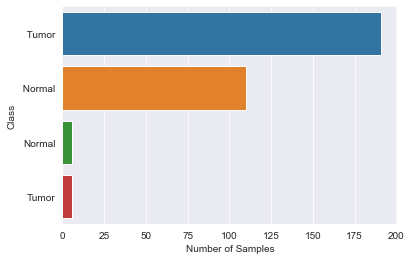

In [12]:
# use barplot to visualize the class distribution of the lung cancer types 
sns.set_style("darkgrid")
sns.barplot(x = "class", y = "index", data = lung_df)
plt.xlabel("Number of Samples")
plt.ylabel("Class")
plt.show()

In [13]:
# take a closer look on different classes 
set(lung_df1_4['class'])

{' Normal', ' Tumor', 'Normal', 'Tumor'}

In [14]:
# replace those unusual class with the correct ones 
lung_df1_4['class'] = lung_df1_4['class'].replace(' Normal', 'Normal')
lung_df1_4['class'] = lung_df1_4['class'].replace(' Tumor', 'Tumor')

In [15]:
# create a dataframe of the class column and then calculated the number of rows corresponding to each class
lung_df_corrected = lung_df1_4['class'].value_counts().reset_index()
lung_df_corrected.head()

,index,class
0,Tumor,197
1,Normal,116


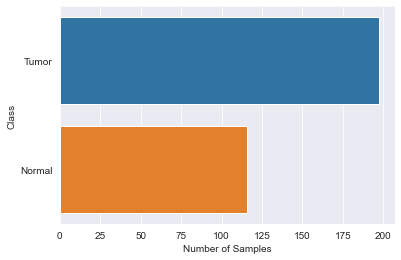

In [16]:
# use barplot to visualize the class distribution of the lung cancer types 
sns.set_style("darkgrid")
sns.barplot(x = "class", y = "index", data = lung_df_corrected)
plt.xlabel("Number of Samples")
plt.ylabel("Class")
plt.show()

## **Data Splitting**

Splitting data into 80% training and 20% testing is to train machine learning models on a majority of the data while reserving a portion for independent evaluation, ensuring the model's generalizability and performance on unseen data.

In [17]:
# split the data into 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(lung_df1_4.drop(['ID', 'class'], axis = 1), 
                                                    lung_df1_4['class'], 
                                                    test_size = 0.20, 
                                                    shuffle = True, 
                                                    random_state = 42, 
                                                    stratify = lung_df1_4['class'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(250, 48)
(63, 48)
(250,)
(63,)


## **Data Resampling**

Using SMOTE-Tomek to resample the class labels is to address class imbalance by synthesizing new minority class instances while simultaneously removing potentially noisy or borderline instances, improving the model's ability to learn from imbalanced data.

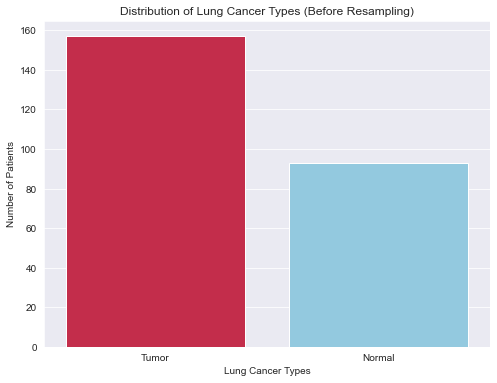

In [18]:
# distribution of lung cancer types before applying resampling technique
plt.figure(figsize = (8, 6))
sns.set_style("darkgrid")
sns.countplot(x = y_train, palette=['crimson', 'skyblue'])
plt.title("Distribution of Lung Cancer Types (Before Resampling)")
plt.xlabel("Lung Cancer Types")
plt.ylabel("Number of Patients")
plt.show()

In [19]:
# applying resampling technique
smote_tomek = SMOTETomek(random_state = 42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

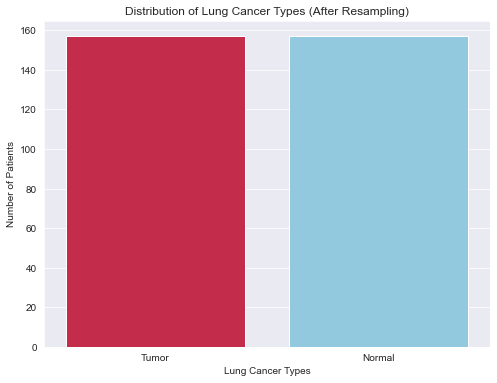

In [20]:
# distribution of lung cancer types after applying resampling technique
plt.figure(figsize = (8, 6))
sns.set_style("darkgrid")
sns.countplot(x = y_train_res, palette=['crimson', 'skyblue'])
plt.title("Distribution of Lung Cancer Types (After Resampling)")
plt.xlabel("Lung Cancer Types")
plt.ylabel("Number of Patients")
plt.show()

## **Data Transformation**

In [21]:
# extract the feature names for numerical features 
num_feature_names = lung_df1_4.drop('ID', axis = 1).select_dtypes(include = ['float64', 'int64']).columns

# standardize the numerical features using standard scaler
standard_scaler = StandardScaler()
X_train_res[num_feature_names] = standard_scaler.fit_transform(X_train_res[num_feature_names])
X_test[num_feature_names] = standard_scaler.transform(X_test[num_feature_names])

# display the transformed input features 
X_train_res.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000003400,ENSG00000003402,ENSG00000003436,ENSG00000003509,ENSG00000003756,ENSG00000003987,ENSG00000003989,ENSG00000004059,ENSG00000004139,ENSG00000004142
0,0.234678,4.634395,0.086224,-0.043637,-0.412079,-0.087568,0.141758,0.291403,-0.062944,0.277055,...,0.203099,0.706053,0.797619,0.860695,0.412302,-2.120354,-0.785904,0.367341,-0.191329,0.659883
1,0.481630,-1.088727,0.393885,0.081690,0.255043,0.044410,0.551511,0.174597,1.796380,0.401716,...,0.272284,0.510074,0.228360,0.324721,0.454481,-0.326132,0.317026,0.230402,-0.414452,0.233399
2,-1.899209,0.540451,-1.775802,-1.289537,-1.163083,-0.637282,-1.147808,-1.646437,-1.524145,-2.031053,...,-1.352449,-0.565953,-0.358369,-2.224981,-1.198323,-1.116561,-0.963517,-1.779758,-2.283342,-1.354213
3,-1.770320,1.695261,-2.576997,-1.545523,-0.436382,-1.718143,-2.187674,-2.372824,-1.423067,-2.332330,...,-2.705504,-1.774165,-2.418789,-1.660614,-2.287721,1.000678,-2.448145,-1.655062,0.441241,-1.292560
4,0.030564,0.022250,0.283700,0.044262,-0.163719,0.387189,0.649831,0.242766,0.039920,0.018010,...,0.413709,0.124715,0.566561,0.504549,0.358854,-0.412508,0.165960,0.155976,0.141204,0.136883


In [22]:
# standardize the categorical features using label encoder 
label_encoder = LabelEncoder()
y_train_res = label_encoder.fit_transform(y_train_res)
y_test = label_encoder.transform(y_test)

# display the scaled class labels 
y_train_res

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## **Baseline Model Selection**

Selecting a baseline model using **default parameters** and from **stratified k-fold cross-validation** as well as **hold-out validation**is to establish a robust initial benchmark for model performance, considering both default parameter settings and cross-validation to ensure a reliable comparison across different folds and to provide a solid foundation for subsequent model refinement and evaluation.

In [23]:
def custom_cross_validation(nSplits, model, X_train, y_train):
    """
    Perform custom cross-validation using StratifiedKFold.
    
    Parameters:
    - nSplits: Number of splits for cross-validation.
    - model: Classifier model to be trained and evaluated.
    - X_train: Training features.
    - y_train: Training labels.
    
    Returns:
    Tuple containing mean training and validation accuracy across folds.
    """
    
    cv = StratifiedKFold(n_splits = nSplits, shuffle = True, random_state = 42)

    train_acc_list = list()
    val_acc_list = list()
    
    for train_index, val_index in cv.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
        
        model.fit(X_train_cv, y_train_cv)
        
        pred_train = model.predict(X_train_cv)
        pred_val = model.predict(X_val_cv)
        
        train_acc = accuracy_score(y_train_cv, pred_train)
        train_acc_list.append(train_acc)
        val_acc = accuracy_score(y_val_cv, pred_val)
        val_acc_list.append(val_acc)
    
    mean_train_acc = np.mean(train_acc_list)
    mean_val_acc = np.mean(val_acc_list)
    
    return (mean_train_acc, mean_val_acc)

### **(A) Decision Tree Classifier**

**Decision Tree Classifier** is a popular machine learning algorithm used for both classification and regression tasks. It works by partitioning the feature space into regions, where each region corresponds to a simple decision rule based on features. Decision trees are easy to interpret and understand, making them useful for exploring relationships in data. They are capable of handling both numerical and categorical data and are robust to outliers and missing values. However, they are prone to overfitting, especially with complex trees, and may not generalize well to unseen data without proper regularization techniques or ensemble methods.

#### **Stratified K-Fold Cross-Validation**

In [24]:
# define a decision tree classifier with a specified random state and default hyperparameters 
dtc = DecisionTreeClassifier(random_state = 42)
# perform custom cross-validation 
dtc_scorings = custom_cross_validation(5, dtc, X_train_res, y_train_res)
# display the cross-validation scorings 
dtc_scorings

(1.0, 0.89810547875064)

#### **Hold-Out Validation**

In [25]:
# fit the decision tree classifier to the training data 
dtc.fit(X_train_res, y_train_res)

# predict labels for the training and testing data 
dtc_pred_train = dtc.predict(X_train_res)
dtc_pred_test = dtc.predict(X_test)

# display the classification report for the training and testing data
print("Classification Report for Training Set")
print("=========================================================")
print(classification_report(y_train_res, dtc_pred_train))
print("Classification Report for Testing Set")
print("=========================================================")
print(classification_report(y_test, dtc_pred_test))

Classification Report for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       157

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.92      0.90      0.91        40

    accuracy                           0.89        63
   macro avg       0.88      0.88      0.88        63
weighted avg       0.89      0.89      0.89        63



### **(B) Random Forest Classifier**

**Random Forest Classifier** is a powerful ensemble learning method based on decision trees. It operates by constructing multiple decision trees during training and outputs the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees. Random forests mitigate overfitting by training each tree on a random subset of the training data and a random subset of the features. They are robust, handle high-dimensional data well, and generally provide high accuracy. Additionally, they can handle missing values and maintain interpretability through feature importance measures. However, they may not perform as well on very imbalanced datasets, and their training time can be longer compared to simpler models. Overall, random forests are a versatile and widely-used algorithm in machine learning for classification and regression tasks.

#### **Stratified K-Fold Cross-Validation**

In [26]:
# define a random forest classifier with a specified random state and default hyperparameters 
rfc = RandomForestClassifier(random_state = 42)
# perform custom cross-validation 
rfc_scorings = custom_cross_validation(5, rfc, X_train_res, y_train_res)
# display the cross-validation scorings 
rfc_scorings

(1.0, 0.977726574500768)

#### **Hold-Out Validation**

In [27]:
# fit the random forest classifier to the training data 
rfc.fit(X_train_res, y_train_res)

# predict labels for the training and testing data 
rfc_pred_train = rfc.predict(X_train_res)
rfc_pred_test = rfc.predict(X_test)

# display the classification report for the training and testing data
print("Classification Report for Training Set")
print("=========================================================")
print(classification_report(y_train_res, rfc_pred_train))
print("Classification Report for Testing Set")
print("=========================================================")
print(classification_report(y_test, rfc_pred_test))

Classification Report for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       157

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.95      1.00      0.98        40

    accuracy                           0.97        63
   macro avg       0.98      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63



### **(C) Gradient Boosting Classifier**

**Gradient Boosting Classifier** is an ensemble learning method that builds a strong predictive model by combining multiple weak learners, typically decision trees, in a sequential manner. Unlike random forests, which train each tree independently, gradient boosting trains trees sequentially, with each tree attempting to correct the errors made by the previous ones. It works by fitting new models to the residual errors of the existing model, gradually improving the overall prediction accuracy. Gradient boosting is known for its high predictive accuracy and ability to handle complex relationships in the data. However, it can be sensitive to overfitting, especially if the number of trees is too large or if the learning rate is not properly tuned. Despite this, gradient boosting is widely used in practice for a variety of machine learning tasks, including classification and regression.

#### **Stratified K-Fold Cross-Validation**

In [28]:
# define a gradient boosting classifier with a specified random state and default hyperparameters 
gbc = GradientBoostingClassifier(random_state = 42)
# perform custom cross-validation 
gbc_scorings = custom_cross_validation(5, gbc, X_train_res, y_train_res)
# display the cross-validation scorings 
gbc_scorings

(1.0, 0.9554531490015361)

#### **Hold-Out Validation**

In [29]:
# fit the gradient boosting classifier to the training data 
gbc.fit(X_train_res, y_train_res)

# predict labels for the training and testing data 
gbc_pred_train = gbc.predict(X_train_res)
gbc_pred_test = gbc.predict(X_test)

# display the classification report for the training and testing data
print("Classification Report for Training Set")
print("=========================================================")
print(classification_report(y_train_res, gbc_pred_train))
print("Classification Report for Testing Set")
print("=========================================================")
print(classification_report(y_test, gbc_pred_test))

Classification Report for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       157

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.93      0.93      0.93        40

    accuracy                           0.90        63
   macro avg       0.90      0.90      0.90        63
weighted avg       0.90      0.90      0.90        63



### **(D) Extra Trees Classifier**

**Extra Trees Classifier** is an ensemble learning method that belongs to the family of decision tree-based algorithms. Similar to Random Forests, it builds multiple decision trees during training. However, what sets Extra Trees apart is its additional randomness in the selection of feature splits and the construction of the trees. Unlike Random Forests, which select the optimal split based on a subset of features, Extra Trees randomly choose splits for each feature. This randomness helps to reduce variance and increase robustness against overfitting, often resulting in faster training times compared to Random Forests. Extra Trees are particularly useful when dealing with high-dimensional datasets or when computational resources are limited.

#### **Stratified K-Fold Cross-Validation**

In [30]:
# define a extra trees classifier with a specified random state and default hyperparameters 
etc = ExtraTreesClassifier(random_state = 42)
# perform custom cross-validation 
etc_scorings = custom_cross_validation(5, etc, X_train_res, y_train_res)
# display the cross-validation scorings 
etc_scorings

(1.0, 0.980952380952381)

#### **Hold-Out Validation**

In [31]:
# fit the extra trees classifier to the training data 
etc.fit(X_train_res, y_train_res)

# predict labels for the training and testing data 
etc_pred_train = etc.predict(X_train_res)
etc_pred_test = etc.predict(X_test)

# display the classification report for the training and testing data
print("Classification Report for Training Set")
print("=========================================================")
print(classification_report(y_train_res, etc_pred_train))
print("Classification Report for Testing Set")
print("=========================================================")
print(classification_report(y_test, etc_pred_test))

Classification Report for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       157

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.97      0.93      0.95        40

    accuracy                           0.94        63
   macro avg       0.93      0.94      0.93        63
weighted avg       0.94      0.94      0.94        63



### **(E) Adaboost Classifier**

**AdaBoost Classifier** is an ensemble learning algorithm that builds a strong classifier by combining multiple weak classifiers sequentially. It works by assigning higher weights to misclassified data points in each iteration, forcing subsequent weak learners to focus more on the difficult-to-classify instances. Through this iterative process, AdaBoost creates a strong model capable of achieving high accuracy even with simple base classifiers. It is particularly effective in handling complex datasets and is less prone to overfitting compared to other ensemble methods. However, AdaBoost may be sensitive to noisy data and outliers. Overall, AdaBoost is a powerful algorithm widely used for classification tasks due to its ability to improve performance over time by continually adapting to the data.

#### **Stratified K-Fold Cross-Validation**

In [32]:
# define a adaboost classifier with a specified random state and default hyperparameters 
abc = AdaBoostClassifier(random_state = 42)
# perform custom cross-validation 
abc_scorings = custom_cross_validation(5, abc, X_train_res, y_train_res)
# display the cross-validation scorings 
abc_scorings

(1.0, 0.9554019457245264)

#### **Hold-Out Validation**

In [33]:
# fit the adaboost classifier to the training data 
abc.fit(X_train_res, y_train_res)

# predict labels for the training and testing data 
abc_pred_train = abc.predict(X_train_res)
abc_pred_test = abc.predict(X_test)

# display the classification report for the training and testing data
print("Classification Report for Training Set")
print("=========================================================")
print(classification_report(y_train_res, abc_pred_train))
print("Classification Report for Testing Set")
print("=========================================================")
print(classification_report(y_test, abc_pred_test))

Classification Report for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       157

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.97      0.90      0.94        40

    accuracy                           0.92        63
   macro avg       0.91      0.93      0.92        63
weighted avg       0.93      0.92      0.92        63



Considering both metrics, it seems that the Extra Trees Classifier or Random Forest Classifier has the highest accuracy on both the stratified k-fold validation and the hold-out test set. Therefore, we may want to choose the Extra Trees Classifier or Random Forest Classifier for further hyperparameter optimization.

## **Hyperparameters Optimization - Random Forest Classifier**

**Hyperparameter optimization** is crucial for Random Forest Classifier despite its high performance because it allows fine-tuning of parameters to further enhance its effectiveness. While Random Forests are robust and versatile, adjusting hyperparameters such as the number of trees, maximum depth of trees, and minimum samples per leaf can optimize its performance for specific datasets and tasks. Hyperparameter optimization ensures that the Random Forest Classifier is effectively tailored to the characteristics of the data, potentially improving accuracy, generalization, and computational efficiency. This process maximizes the algorithm's potential and ensures that it achieves the best possible performance across different scenarios, ultimately leading to more reliable and accurate predictions.

In [ ]:
# initialize the best validation score to zero
best_score = 0 

# iterate through various hyperparameters 
for n_estimators in np.arange(10, 60, 10):
    for max_depth in [6, 7, 8, 9, 10]:
        for min_samples_split in [2, 3, 4, 5]:
            for min_samples_leaf in [6, 7, 8, 9, 10]:
                
                # create a random forest classifier with current hyperparameters
                rfc_gs = RandomForestClassifier(n_estimators = n_estimators, 
                                                max_depth = max_depth, 
                                                min_samples_split = min_samples_split,
                                                min_samples_leaf = min_samples_leaf,
                                                random_state = 42)
                
                # perform custom cross validation to evaluate the classifier
                rfc_cv_scores_gs = custom_cross_validation(5, rfc_gs, X_train_res, y_train_res)
                
                # display the performance hyperparameters with metrics
                print("n_estimators = {}, max_depth = {}, min_samples_split = {}, min_samples_leaf = {} Overall: (Train = {:.4f}, Validation = {:.4f})".format(n_estimators, max_depth, min_samples_split, min_samples_leaf, rfc_cv_scores_gs[0], rfc_cv_scores_gs[1]))
                
                # update the best score for best hyperparameters
                if rfc_cv_scores_gs[1] > best_score:
                    best_score = rfc_cv_scores_gs[1]
                    best_hyperparameters = {'n_estimators': n_estimators, 
                                            'max_depth': max_depth,
                                            'min_samples_split': min_samples_split,
                                            'min_samples_leaf': min_samples_leaf}

n_estimators = 10, max_depth = 6, min_samples_split = 2, min_samples_leaf = 6 Overall: (Train = 0.9857, Validation = 0.9491)
n_estimators = 10, max_depth = 6, min_samples_split = 2, min_samples_leaf = 7 Overall: (Train = 0.9801, Validation = 0.9458)
n_estimators = 10, max_depth = 6, min_samples_split = 2, min_samples_leaf = 8 Overall: (Train = 0.9841, Validation = 0.9459)
n_estimators = 10, max_depth = 6, min_samples_split = 2, min_samples_leaf = 9 Overall: (Train = 0.9817, Validation = 0.9459)
n_estimators = 10, max_depth = 6, min_samples_split = 2, min_samples_leaf = 10 Overall: (Train = 0.9737, Validation = 0.9554)
n_estimators = 10, max_depth = 6, min_samples_split = 3, min_samples_leaf = 6 Overall: (Train = 0.9857, Validation = 0.9491)
n_estimators = 10, max_depth = 6, min_samples_split = 3, min_samples_leaf = 7 Overall: (Train = 0.9801, Validation = 0.9458)
n_estimators = 10, max_depth = 6, min_samples_split = 3, min_samples_leaf = 8 Overall: (Train = 0.9841, Validation = 0.9459)

In [ ]:
# display the best hyperparameters and best overall score
print("The best hyperparameters for Random Forest Classifier: {}".format(best_hyperparameters))
print("The best overall score for Random Forest Classifier: {:.4f}".format(best_score))

The best hyperparameters for Random Forest Classifier: {'n_estimators': 30, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 7}
The best overall score for Random Forest Classifier: 0.9746


## **Model Training and Evaluation on Optimized Hyperparameters**

Model training and evaluation on a hyperparameter-optimized Random Forest Classifier ensure maximized performance by fine-tuning parameters for optimal accuracy and generalization.

In [ ]:
# create a random forest classifier with optimized hyperparameters
rfc_opt = RandomForestClassifier(n_estimators = 30, 
                                 max_depth = 6, 
                                 min_samples_split = 2, 
                                 min_samples_leaf = 7, 
                                 random_state = 42)
# fitting the classifier to the training data
rfc_opt.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=6, min_samples_leaf=7, n_estimators=30,
                       random_state=42)

In [ ]:
# making predictions on the training set and testing set
rfc_opt_pred_train = rfc_opt.predict(X_train_res)
rfc_opt_pred_test = rfc_opt.predict(X_test)

In [ ]:
# display the classification report for the training set and testing set
print("Classification Report for Training Set")
print("=========================================================")
print(classification_report(y_train_res, rfc_opt_pred_train))
print("Classification Report for Testing Set")
print("=========================================================")
print(classification_report(y_test, rfc_opt_pred_test))

Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       157

    accuracy                           0.99       314
   macro avg       0.99      0.99      0.99       314
weighted avg       0.99      0.99      0.99       314

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.95      0.95      0.95        40

    accuracy                           0.94        63
   macro avg       0.93      0.93      0.93        63
weighted avg       0.94      0.94      0.94        63



The classification report for the optimized Random Forest Classifier reveals strong performance on both the training and testing sets. With precision, recall, and F1-score all consistently high across both classes, the model demonstrates robustness in correctly identifying instances of both classes. The weighted average F1-score of 0.99 for the training set indicates excellent overall performance, while the testing set's weighted average F1-score of 0.94 suggests generalization to unseen data, though slightly lower than the training set. These results signify effective hyperparameter optimization, resulting in a well-generalized model with high accuracy and balanced performance across classes.

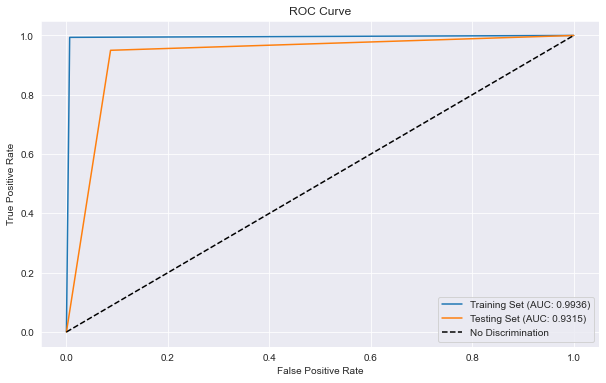

In [ ]:
# calculate the ROC curves and AUC scores 
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, rfc_opt_pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, rfc_opt_pred_test)
# calculate the auc scores 
auc_train = roc_auc_score(y_train_res, rfc_opt_pred_train)
auc_test = roc_auc_score(y_test, rfc_opt_pred_test)

# create ROC curves 
plt.figure(figsize = (10, 6))
sns.set_style("darkgrid")
sns.lineplot(x = fpr_train, y = tpr_train, label = "Training Set (AUC: {:.4f})".format(auc_train))
sns.lineplot(x = fpr_test, y = tpr_test, label = "Testing Set (AUC: {:.4f})".format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', label = "No Discrimination")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

A high AUC of 0.9936 for the training set indicates excellent discrimination ability, suggesting that the model can effectively differentiate between positive and negative instances in the training data. However, the AUC of 0.9315 for the testing set, while still relatively high, is slightly lower than that of the training set. This discrepancy suggests that while the model performs well on unseen data, there may be some degree of overfitting to the training data. Nonetheless, the testing set's AUC value still indicates strong discriminatory power and suggests that the model's performance generalizes well to new data, albeit with a slight drop in performance compared to the training set.

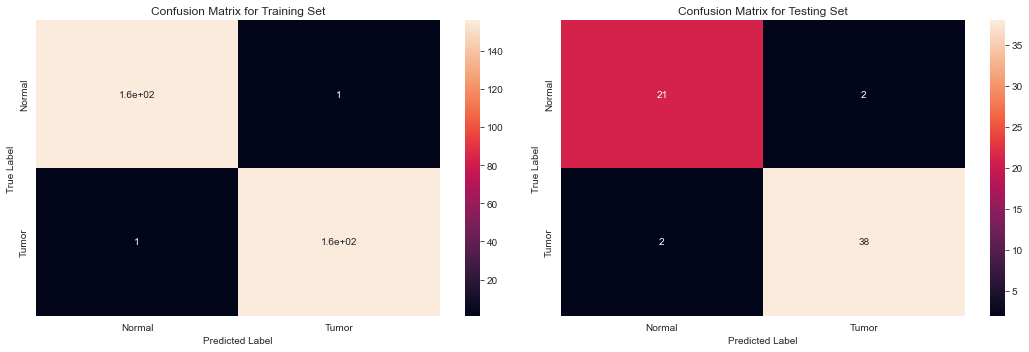

In [ ]:
# create a confusion matrix for training sets
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
cnf_matrix_train = confusion_matrix(y_train_res, rfc_opt_pred_train)
cnf_matrix_train_df = pd.DataFrame(cnf_matrix_train, index = ['Normal', 'Tumor'], columns = ['Normal', 'Tumor'])
plt.title("Confusion Matrix for Training Set")
sns.heatmap(cnf_matrix_train_df, annot =True)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# create a confusion matrix for testing sets
plt.subplot(1, 2, 2)
cnf_matrix_test = confusion_matrix(y_test, rfc_opt_pred_test)
cnf_matrix_test_df = pd.DataFrame(cnf_matrix_test, index = ['Normal', 'Tumor'], columns = ['Normal', 'Tumor'])
plt.title("Confusion Matrix for Testing Set")
sns.heatmap(cnf_matrix_test_df, annot =True)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.tight_layout()
plt.show()

The confusion matrices provide a detailed breakdown of the performance of the optimized Random Forest Classifier on both the training and testing sets. In the training set, there were 162 true positives (TP) and 162 true negatives (TN), indicating that the model correctly classified instances of both classes. There was only one false positive (FP) and one false negative (FN), indicating a high level of accuracy and balance in classification. Similarly, in the testing set, there were 38 true positives and 21 true negatives, showing the model's ability to correctly identify instances of both classes in unseen data. However, there were two false positives and two false negatives, suggesting a slight decrease in performance compared to the training set. Overall, the results indicate strong performance and generalization of the model to new data, albeit with a small amount of misclassification.